In [1]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [3]:
# taking csv prepared earlier to explore data 

filepath = "email.csv"
# Read the data into a pandas dataframe called emails

df_email = pd.read_csv(filepath)

headers = [header for header in df_email.columns]

print("Successfully loaded {} rows and {} columns!".format(df_email.shape[0], df_email.shape[1]))

print(display(df_email.head(3)))

Successfully loaded 517401 rows and 12 columns!


,file,message,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-bc,X-Origin
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,Allen-P
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ...",traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,NaN,Allen-P
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700...",test successful. way to go!!!,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,NaN,Allen-P


None


In [4]:
df_email.isna().sum()

file                 0
message              0
Message-Body         0
X-From              29
employee             0
Date                 0
Subject          19187
X-Folder            29
X-To              9153
X-cc            388515
X-bc            517401
X-Origin            29
dtype: int64

In [5]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df_email['email-body'] = df_email['message'].apply(cleanemail)

In [6]:
df_email = df_email.drop(columns=['message', 'file', 'X-bc'])

In [7]:
df_email.isna().sum()

Message-Body         0
X-From              29
employee             0
Date                 0
Subject          19187
X-Folder            29
X-To              9153
X-cc            388515
X-Origin            29
email-body           0
dtype: int64

In [19]:
df_email['Date'] = pd.to_datetime(df_email['Date'])


df_email['Date'].dtypes

datetime64[ns, UTC]

In [44]:
# taking time frame from 1998 to 2002 
'''import datetime 

d1 = datetime.datetime(1998, 1, 1) 
d2 = datetime.datetime(2003, 1, 1) 

mask = df_email[(df_email['Date'] >= d1 and df_email['Date'] <= d2 )]

#df_new = df.drop[df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index]'''

"import datetime \n\nd1 = datetime.datetime(1998, 1, 1) \nd2 = datetime.datetime(2003, 1, 1) \n\nmask = df_email[(df_email['Date'] >= d1 and df_email['Date'] <= d2 )]\n\n#df_new = df.drop[df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index]"

In [38]:
#Convert date column to datetime 

df_email["Date"] = pd.to_datetime(df_email["Date"])

### Adding classification by year to dataframe:
### Datetime is set as an idex and column year is added
df_email['year'] = pd.DatetimeIndex(df_email['Date']).year

#### Selection of years of interest:
data = df_email[df_email.year > 1998]
data = data[data.year < 2003] 

In [39]:
data.head()

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,year
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,2001
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,2001
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,2000
3,Phillip K Allen,allen-p,2000-10-23 13:13:00+00:00,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Randall L Gay,NaN,Allen-P,"Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group....",2000
4,Phillip K Allen,allen-p,2000-08-31 12:07:00+00:00,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Greg Piper,NaN,Allen-P,Let's shoot for Tuesday at 11:45.,2000


In [41]:
#df_email.groupby('employee')[['email-body']].nunique()

data = df_email.drop_duplicates(['email-body'])

In [43]:
data.shape

(313217, 10)

In [47]:
data['X-From'].value_counts().head(5)

Jeff Dasovich                             6293
Schedule Crawler<pete.davis@enron.com>    5334
Kay Mann                                  5056
Tana Jones                                4639
Vince J Kaminski                          4519
Name: X-From, dtype: int64

In [48]:
data['X-To'].value_counts().head(3)

pete.davis@enron.com                                     5334
Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=PDAVIS1>    3806
Tana Jones                                               2026
Name: X-To, dtype: int64

In [10]:
df_employee = df_email.groupby(['employee']).describe()

In [11]:
PKA = df_email.groupby(['X-From', 'X-To'])

PKA.get_group(('Kay Mann', 'Kay Mann')).count()


Message-Body    53
X-From          53
employee        53
Date            53
Subject         53
X-Folder        53
X-To            53
X-cc            39
X-Origin        53
email-body      53
dtype: int64

In [21]:
df_email.head(3)

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
0,here is our forecast\n\n,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast
1,traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...
2,test successful. way to go!!!,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!


In [22]:
df_email = df_email.drop(columns=['Message-Body'])

In [23]:
df_email.head(3)

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!


In [17]:
#df_email.to_csv('data.csv',index=False)

In [15]:
#print(df_email.iloc[:]["X-Folder"].nunique())

df_email['X-Folder'].value_counts()

\Kay_Mann_June2001_1\Notes Folders\All documents                   6639
\Tanya_Jones_Dec2000\Notes Folders\All documents                   5934
\Jeff_Dasovich_June2001\Notes Folders\All documents                5637
\Sara_Shackleton_Dec2000_June2001_1\Notes Folders\All documents    5211
\Vincent_Kaminski_Jun2001_1\Notes Folders\All documents            5066
                                                                   ... 
\Charles_Wheldon_Nov2001\Notes Folders\Lng                            1
\KRUSCIT (Non-Privileged)\EOL                                         1
\DMCCARTY (Non-Privileged)\McCarty, Danny\Inbox\TW                    1
\KWATSON (Non-Privileged)\Watson, Kimberly\Sun Devil Expansion        1
\ExMerge - Griffith, John\New Items                                   1
Name: X-Folder, Length: 5335, dtype: int64


The `X-Folder` column contains several folders and subfolders that are not needed.  These include non-topical folders, which refer to folders that hold e-mails regardless of content.  These are removed because it is pretty hard to accurately train a classifier using them. Here's a few non-topical folders:
* all_documents
* discussion_threads
* sent
* deleted_items
* inbox
* sent_items
* notes_inbox
* _sent_mail
* calendar

In [16]:
print(df_email["X-Folder"].sample(7))

491806     \Kim_Ward_Nov2001\Notes Folders\All documents
110487     \Farmer, Daren J.\Farmer, Daren J.\Sent Items
295636          \Phillip_Love_Dec2000\Notes Folders\Sent
193684    \Tanya_Jones_Dec2000\Notes Folders\Notes inbox
295073                \PLOVE (Non-Privileged)\Sent Items
98936        \FERMIS (Non-Privileged)\Ermis, Frank\Inbox
486414      \Jane_Tholt_Jun2001\Notes Folders\'sent mail
Name: X-Folder, dtype: object


AttributeError: module 'seaborn' has no attribute 'plt'

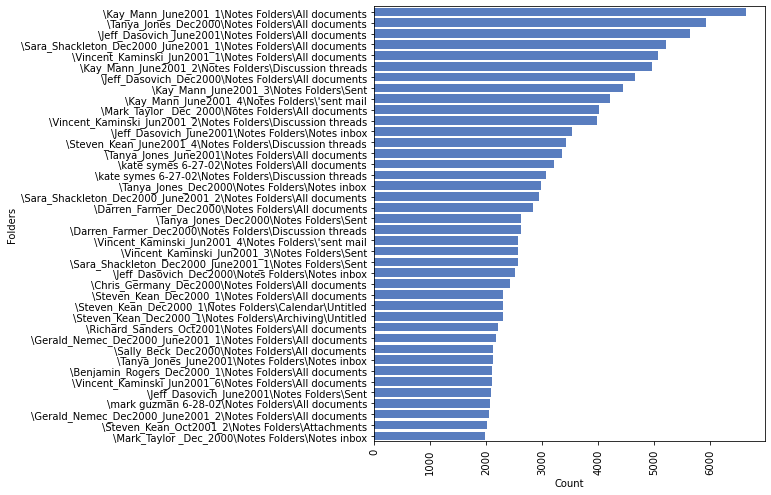

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = df_email["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    sns.plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [31]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
df_email["Selected"] = preprocess_folder(df_email["X-Folder"])

SyntaxError: invalid syntax (<ipython-input-31-0c84c7853c81>, line 4)

In [49]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/becode/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/becode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [16]:
df_email['Date'] = pd.to_datetime(df_email["Date"])
df_email['Date'].dtypes

datetime64[ns, UTC]

In [17]:
df_email.head(3)

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!


In [1]:
df_email.groupby(['X-From'])

NameError: name 'df_email' is not defined

In [ ]:
value_counts().plot(kind='bar')

### systematic analysis 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [54]:
## Change the reviews type to string
data['reviews.text'] = data['email-body'].astype(str)

<ipython-input-54-55ee369b28d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['email-body'].astype(str)


In [55]:
data['reviews.text'].head(3)

0                                                                                 Here is our forecast  
1     Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to ...
2                                                                         test successful.  way to go!!!
Name: reviews.text, dtype: object

In [56]:
## Lowercase all reviews
data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-56-2d9f48872d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [57]:
data['reviews.text'].head(3)

0                                                                                   here is our forecast
1    traveling to have a business meeting takes the fun out of the trip. especially if you have to pr...
2                                                                          test successful. way to go!!!
Name: reviews.text, dtype: object

In [19]:
# remove punctuation
#df_email['reviews.text'] = df_email['reviews.text'].str.replace(pat = [''])

In [1]:
#df_email['reviews.text'].str.replace('[^ws]','')


In [59]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /home/becode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-59-d359d5ab26a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [60]:
st = PorterStemmer()

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

<ipython-input-60-bdb19cae2279>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [61]:
data['reviews.text'].head(3)

0                                                                                               forecast
1    travel busi meet take fun trip. especi prepar presentation. would suggest hold busi plan meet ta...
2                                                                             test successful. way go!!!
Name: reviews.text, dtype: object

In [26]:
df_email.head(3)

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,reviews.text
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,forecast
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail",John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,travel busi meet take fun trip. especi prepar presentation. would suggest hold busi plan meet ta...
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,test successful. way go!!!


In [ ]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

data['senti_score'] = data['reviews.text'].apply(senti)

data.senti_score.head()

In [26]:
data.senti_score.head()

(0.0, 0.0)    517401
Name: senti_score, dtype: int64